# **Projeto Integrado Feature Engineering**





In [31]:
# Importação das bibliotecas necessárias para manipulação de dados, visualização e técnicas de machine learning.
import numpy as np
import pandas as pd

In [32]:
# Carregando o conjunto de dados que será utilizado para o projeto.

df_descritivo = pd.read_excel(r"descritivo_características.xlsx",engine='openpyxl')
dataset = pd.read_csv("./dataset.txt", sep="\t", encoding="latin1")
dataset.columns = df_descritivo['Característica'].tolist()

C:\Users\guilherme.luz\AppData\Local\Temp\ipykernel_20548\2983171997.py:4: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("./dataset.txt", sep="\t", encoding="latin1")


## **Modelo Baseline**

In [33]:
#Importando bibliotecas necessárias para o modelo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
# Criar um novo dataset apenas com as colunas que não possuem nenhum valor nulo
dataset_sem_nulos = dataset.dropna(axis=1, how='any')

In [35]:
# Separando o dataset entre treino e teste
# A critério de um baseline, não iremos utilizar as variáveis categóricas

X = dataset_sem_nulos.drop(columns=['ROTULO_ALVO_MAU=1'])
X = X.select_dtypes(include=['int64', 'float64'])
y = dataset_sem_nulos['ROTULO_ALVO_MAU=1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Normalizando as variaveis numéricas

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Define the KNN Classifier
knn = KNeighborsClassifier()

# Define o range de K
k_values = range(1, 50)

# Criação das listas para armazenar o resultado
accuracies = []
reports = []
matrices = []

# Loop para cada valor de K value e avaliação do modelo
for k in k_values:
    knn.set_params(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Cálculo de acurácia
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Geração do reporte de classificação
    report = classification_report(y_test, y_pred)
    reports.append(report)
    
    # Geração da matriz de confusão
    matrix = confusion_matrix(y_test, y_pred)
    matrices.append(matrix)

# Buscando o K com maior acurácia
best_k = k_values[accuracies.index(max(accuracies))]

print(f"Melhor K value: {best_k}")
print(f"Acurácia: {max(accuracies)}")
print(reports[accuracies.index(max(accuracies))])
print(matrices[accuracies.index(max(accuracies))])

_Avaliação das variáveis que mais impactaram o baseline_

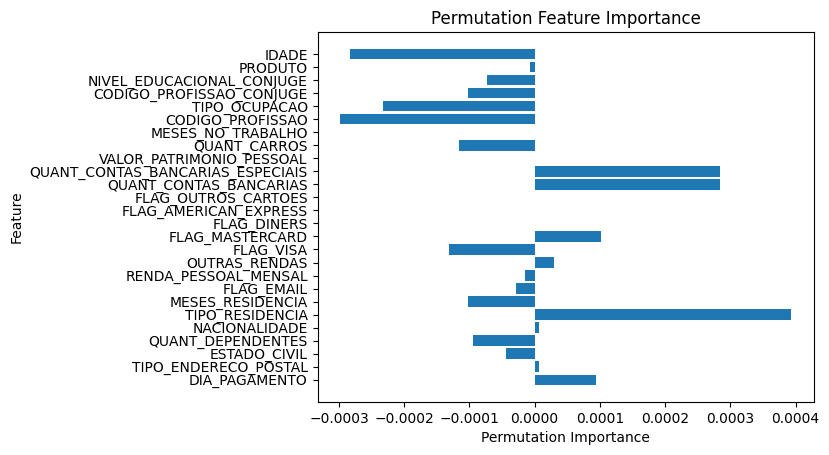

In [25]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Treino do KNN com o melhor valor de k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Calculo de Permutation Importance para avaliar qual variável teve o maior impacto no modelo

results = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

# Feature Importance Scores
importances = results.importances_mean

# Plot de scores
plt.barh(X.columns, importances)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.show()

O modelo sem dados nulos apresentou 74% de assertividade, porém uma grande dificuldade de mapear maus credores.

## **Data Understanding & Cleaning**

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         49999 non-null  int64  
 1   TIPO_FUNCIONARIO                   49999 non-null  object 
 2   DIA_PAGAMENTO                      49999 non-null  int64  
 3   TIPO_ENVIO_APLICACAO               49999 non-null  object 
 4   QUANT_CARTOES_ADICIONAIS           49999 non-null  int64  
 5   TIPO_ENDERECO_POSTAL               49999 non-null  int64  
 6   SEXO                               49999 non-null  object 
 7   ESTADO_CIVIL                       49999 non-null  int64  
 8   QUANT_DEPENDENTES                  49999 non-null  int64  
 9   NIVEL_EDUCACIONAL                  49999 non-null  int64  
 10  ESTADO_NASCIMENTO                  49999 non-null  object 
 11  CIDADE_NASCIMENTO                  49999 non-null  obj

In [4]:
dataset.head()

,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,...,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO_MAU=1
0,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
1,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
2,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
3,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1
4,6,C,10,0,0,1,M,2,0,0,...,0,0,0,0,2,N,40,371,371,1


In [5]:
dataset.describe()

,ID_CLIENTE,DIA_PAGAMENTO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,NACIONALIDADE,TIPO_RESIDENCIA,MESES_RESIDENCIA,...,TIPO_OCUPACAO,CODIGO_PROFISSAO_CONJUGE,NIVEL_EDUCACIONAL_CONJUGE,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,IDADE,ROTULO_ALVO_MAU=1
count,49999.000000,49999.000000,49999.0,49999.000000,49999.000000,49999.000000,49999.0,49999.000000,48650.000000,46222.000000,...,42686.000000,21116.000000,17662.000000,49999.0,49999.0,49999.0,49999.0,49999.000000,49999.000000,49999.000000
mean,25001.000000,12.870077,0.0,1.006540,2.148323,0.650513,0.0,0.961599,1.252230,9.727035,...,2.484281,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275706,43.248745,0.260805
std,14433.612391,6.608357,0.0,0.080607,1.322751,1.193666,0.0,0.202107,0.867841,10.668928,...,1.532262,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988295,14.989115,0.439078
min,2.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.000000,0.000000
25%,12501.500000,10.000000,0.0,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.000000,0.000000
50%,25001.000000,10.000000,0.0,1.000000,2.000000,0.000000,0.0,1.000000,1.000000,6.000000,...,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.000000,0.000000
75%,37500.500000,15.000000,0.0,1.000000,2.000000,1.000000,0.0,1.000000,1.000000,15.000000,...,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.000000,1.000000
max,50000.000000,25.000000,0.0,2.000000,7.000000,53.000000,0.0,2.000000,5.000000,228.000000,...,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.000000,1.000000


A partir da descrição estatística das variáveis, é possível notar que as variáveis quantitativas "QUANT_CARTOES_ADICIONAIS", "NIVEL_EDUCACIONAL", "FLAG_DOCUMENTO_RESIDENCIAL", "FLAG_RG", "FLAG_CPF", "FLAG_COMPROVANTE_RENDA" estão com todos seus valores nulos, e, portanto, serão descartadas.
Outras colunas como ID_CLIENTE, não agregam nada ao modelo e também será descartada

In [6]:
#Retirar as colunas "QUANT_CARTOES_ADICIONAIS", "NIVEL_EDUCACIONAL", "FLAG_DOCUMENTO_RESIDENCIAL", "FLAG_RG"
#"FLAG_CPF", "FLAG_COMPROVANTE_RENDA" do dataset

columns_to_drop = ["ID_CLIENTE","QUANT_CARTOES_ADICIONAIS", "NIVEL_EDUCACIONAL", "FLAG_DOCUMENTO_RESIDENCIAL", "FLAG_RG", "FLAG_CPF", "FLAG_COMPROVANTE_RENDA"]
dataset = dataset.drop(columns=columns_to_drop)


In [7]:
# Analisar quantos valores distintos existem para as colunas categoricas

# Selecionar apenas as colunas categóricas
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Iterar sobre as colunas categóricas e imprimir o número de valores distintos
for column in categorical_columns:
  print(f"Coluna: {column}, Número de valores distintos: {dataset[column].nunique()}")


Coluna: TIPO_FUNCIONARIO, Número de valores distintos: 1
Coluna: TIPO_ENVIO_APLICACAO, Número de valores distintos: 3
Coluna: SEXO, Número de valores distintos: 4
Coluna: ESTADO_NASCIMENTO, Número de valores distintos: 29
Coluna: CIDADE_NASCIMENTO, Número de valores distintos: 9910
Coluna: ESTADO_RESIDENCIAL, Número de valores distintos: 27
Coluna: CIDADE_RESIDENCIAL, Número de valores distintos: 3528
Coluna: BAIRRO_RESIDENCIAL, Número de valores distintos: 14511
Coluna: FLAG_TELEFONE_RESIDENCIAL, Número de valores distintos: 2
Coluna: CODIGO_AREA_TELEFONE_RESIDENCIAL, Número de valores distintos: 102
Coluna: FLAG_TELEFONE_MOVEL, Número de valores distintos: 1
Coluna: EMPRESA, Número de valores distintos: 2
Coluna: ESTADO_PROFISSIONAL, Número de valores distintos: 28
Coluna: CIDADE_PROFISSIONAL, Número de valores distintos: 2236
Coluna: BAIRRO_PROFISSIONAL, Número de valores distintos: 5057
Coluna: FLAG_TELEFONE_PROFISSIONAL, Número de valores distintos: 2
Coluna: CODIGO_AREA_TELEFONE_

A partir da contagem de valores distintos das variáveis categoricas, é possível notar que as colunas "TIPO_FUNCIONARIO", "FLAG_TELEFONE_MOVEL", "FLAG_REGISTRO_ACSP" estão com todos seus valores iguais, e, portanto, serão descartadas.

In [8]:
columns_cat_to_drop = ["TIPO_FUNCIONARIO", "FLAG_TELEFONE_MOVEL", "FLAG_REGISTRO_ACSP"]
dataset = dataset.drop(columns=columns_cat_to_drop)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DIA_PAGAMENTO                      49999 non-null  int64  
 1   TIPO_ENVIO_APLICACAO               49999 non-null  object 
 2   TIPO_ENDERECO_POSTAL               49999 non-null  int64  
 3   SEXO                               49999 non-null  object 
 4   ESTADO_CIVIL                       49999 non-null  int64  
 5   QUANT_DEPENDENTES                  49999 non-null  int64  
 6   ESTADO_NASCIMENTO                  49999 non-null  object 
 7   CIDADE_NASCIMENTO                  49999 non-null  object 
 8   NACIONALIDADE                      49999 non-null  int64  
 9   ESTADO_RESIDENCIAL                 49999 non-null  object 
 10  CIDADE_RESIDENCIAL                 49999 non-null  object 
 11  BAIRRO_RESIDENCIAL                 49999 non-null  obj

**Após a limpeza inicial de dados saimos de 53 variáveis para 43 sem considerar a variável alvo (ROTULO_ALVO_MAU=1). Os próximos passos serão tratar, de forma simples e rápida, os dados nulos e os dados existentes para aplicar um modelo baseline**

### **Análise de Dados Nulos**

In [10]:
# Calcula a quantidade de valores nulos para cada coluna
null_counts = dataset.isnull().sum()

# Filtra apenas as colunas que possuem pelo menos um valor nulo
columns_with_nulls = null_counts[null_counts > 0]

# Cria um novo DataFrame com as colunas que possuem valores nulos
df_nulls = pd.DataFrame({'Quantidade de Nulos': columns_with_nulls})

# Calcula a porcentagem de valores nulos para cada coluna
df_nulls['Porcentagem de Nulos (%)'] = (df_nulls['Quantidade de Nulos'] / len(dataset)) * 100

# Organiza df_nulls em ordem crescente da coluna 'Quantidade de Nulos'
df_nulls = df_nulls.sort_values(by='Quantidade de Nulos')


# Imprime o DataFrame com a quantidade e a porcentagem de valores nulos para cada coluna
print("Colunas com valores nulos:")
print(df_nulls)


Colunas com valores nulos:
                           Quantidade de Nulos  Porcentagem de Nulos (%)
TIPO_RESIDENCIA                           1349                  2.698054
MESES_RESIDENCIA                          3777                  7.554151
TIPO_OCUPACAO                             7313                 14.626293
CODIGO_PROFISSAO                          7756                 15.512310
CODIGO_PROFISSAO_CONJUGE                 28883                 57.767155
NIVEL_EDUCACIONAL_CONJUGE                32337                 64.675294
CIDADE_PROFISSIONAL                      33782                 67.565351
BAIRRO_PROFISSIONAL                      33782                 67.565351


Nota-se que 8 variáveis apresentam valores nulos

#### Colunas com menos de 10% de valores nulls

A exclusão de linhas com menos de 10% de valores nulos é uma estratégia adequada para um modelo baseline, principalmente porque tem um impacto mínimo no conjunto de dados como um todo. Ao remover apenas uma pequena fração das linhas, preserva-se a grande maioria dos dados, mantendo assim a estrutura geral e as relações entre as variáveis praticamente inalteradas. Esta abordagem oferece uma solução simples e rápida, com baixo risco de introduzir viés significativo ou alterar substancialmente as características do dataset. O impacto reduzido nos dados permite uma análise inicial eficiente, enquanto mantém a integridade e a representatividade do conjunto original, tornando-a uma escolha pragmática para as primeiras etapas do processo de modelagem.

In [11]:
# Identificando colunas com menos de 10% de valores nulos usando df_nulls
colunas_menos_10_porcento = df_nulls[df_nulls['Porcentagem de Nulos (%)'] < 10].index.tolist()

# Removendo linhas com valores nulos nas colunas identificadas
dataset = dataset.dropna(subset=colunas_menos_10_porcento)

print("Número de linhas após remoção:", len(dataset))
print("Colunas afetadas:", colunas_menos_10_porcento)



Número de linhas após remoção: 45820
Colunas afetadas: ['TIPO_RESIDENCIA', 'MESES_RESIDENCIA']


#### Tratamento de Valores Nulos em Variáveis Categóricas

Colunas tratadas:
- TIPO_OCUPACAO 
- CODIGO_PROFISSAO
- CODIGO_PROFISSAO_CONJUGE
- NIVEL_EDUCACIONAL_CONJUGE
- BAIRRO_PROFISSIONAL
- CIDADE_PROFISSIONAL

Justificativa da abordagem:
1. Consistência: Aplicamos o mesmo tratamento para todas as variáveis categóricas com valores ausentes.
2. Preservação da informação: A categoria "Não informado" mantém a distinção entre dados fornecidos e não fornecidos.
3. Interpretabilidade: Facilita a compreensão dos dados ausentes nas análises subsequentes.
4. Adequação ao contexto: Para informações como profissão, nível educacional e localização, "Não informado" é uma representação apropriada da ausência de dados.

In [12]:
# Substituindo valores nulos por 999 para colunas numéricas
colunas_numericas = ['TIPO_OCUPACAO', 'CODIGO_PROFISSAO', 'CODIGO_PROFISSAO_CONJUGE', 'NIVEL_EDUCACIONAL_CONJUGE']
for coluna in colunas_numericas:
    dataset[coluna] = dataset[coluna].fillna(999)

# Substituindo valores nulos por "Não informado" para colunas de texto
colunas_texto = ['CIDADE_PROFISSIONAL', 'BAIRRO_PROFISSIONAL']
for coluna in colunas_texto:
    dataset[coluna] = dataset[coluna].replace(' ','Não informado').fillna("Não informado")

print("Tratamento de valores nulos concluído.")
print(dataset[colunas_numericas + colunas_texto].isnull().sum())



Tratamento de valores nulos concluído.
TIPO_OCUPACAO                0
CODIGO_PROFISSAO             0
CODIGO_PROFISSAO_CONJUGE     0
NIVEL_EDUCACIONAL_CONJUGE    0
CIDADE_PROFISSIONAL          0
BAIRRO_PROFISSIONAL          0
dtype: int64


In [13]:
# Calcula a quantidade de valores nulos para cada coluna
null_counts = dataset.isnull().sum()

# Filtra apenas as colunas que possuem pelo menos um valor nulo
columns_with_nulls = null_counts[null_counts > 0]

# Cria um novo DataFrame com as colunas que possuem valores nulos
df_nulls = pd.DataFrame({'Quantidade de Nulos': columns_with_nulls})

# Calcula a porcentagem de valores nulos para cada coluna
df_nulls['Porcentagem de Nulos (%)'] = (df_nulls['Quantidade de Nulos'] / len(dataset)) * 100

# Organiza df_nulls em ordem crescente da coluna 'Quantidade de Nulos'
df_nulls = df_nulls.sort_values(by='Quantidade de Nulos')


# Imprime o DataFrame com a quantidade e a porcentagem de valores nulos para cada coluna
print("Colunas com valores nulos:")
print(df_nulls)

Colunas com valores nulos:
Empty DataFrame
Columns: [Quantidade de Nulos, Porcentagem de Nulos (%)]
Index: []


### **Análise dos Dados Existentes**

_Para as variáveis onde há todos os dados, é necessário entender se os dados existentes fazem sentido_

Vamos começar analisando as variáveis binárias e categoricas. Variáveis como renda e patrimônio possuem muitos valores possíveis e sua coerência será analisada posteriormente a partir de análises de outliers. Enquanto as variáveis de texto como cidade e bairro não serão analisadas por existir inumeras possibilidades. As variáveis e CEP serão analisadas isoladamente

#### **Análise Binárias e Categoricas**

_Aqui buscamos entender os tipos de dados únicos existentes para variáveis binárias e categóricas_

In [16]:
columns_to_drop_x = ["CIDADE_NASCIMENTO", "CIDADE_RESIDENCIAL", "BAIRRO_RESIDENCIAL", "RENDA_PESSOAL_MENSAL", "OUTRAS_RENDAS", "VALOR_PATRIMONIO_PESSOAL", "CEP_RESIDENCIAL_3", "CEP_PROFISSIONAL_3"]
columns_without_nulls = dataset_sem_nulos.drop(columns=columns_to_drop_x)

In [17]:
# Iterar sobre as colunas e imprimir os valores distintos
for column in columns_without_nulls.columns:
    print(f"Coluna: {column}")
    print(columns_without_nulls[column].unique())
    print("-" * 20)

Coluna: DIA_PAGAMENTO
[15 10 25  5 20  1]
--------------------
Coluna: TIPO_ENVIO_APLICACAO
['Carga' 'Web' '0']
--------------------
Coluna: TIPO_ENDERECO_POSTAL
[1 2]
--------------------
Coluna: SEXO
['F' 'M' 'N' ' ']
--------------------
Coluna: ESTADO_CIVIL
[2 1 5 3 7 4 6 0]
--------------------
Coluna: QUANT_DEPENDENTES
[ 0  2  1  3  4  5  6  7 10  8 13 11  9 12 14 15 53]
--------------------
Coluna: ESTADO_NASCIMENTO
['RJ' 'MG' 'BA' 'SP' 'RS' 'CE' 'PE' 'RN' 'PA' 'PB' 'MA' ' ' 'AC' 'MT' 'AL'
 'AP' 'GO' 'TO' 'SC' 'PR' 'DF' 'PI' 'MS' 'RO' 'ES' 'AM' 'SE' 'RR' 'XX']
--------------------
Coluna: NACIONALIDADE
[1 0 2]
--------------------
Coluna: ESTADO_RESIDENCIAL
['RJ' 'MG' 'BA' 'SP' 'RS' 'CE' 'RN' 'AP' 'MS' 'DF' 'PB' 'MA' 'PA' 'PR'
 'PE' 'MT' 'AL' 'ES' 'GO' 'SC' 'AM' 'RO' 'PI' 'RR' 'TO' 'SE' 'AC']
--------------------
Coluna: FLAG_TELEFONE_RESIDENCIAL
['Y' 'N']
--------------------
Coluna: CODIGO_AREA_TELEFONE_RESIDENCIAL
['20' '33' '81' ' ' '12' '54' '107' '32' '39' '5' '105' '24' '

#### **Análise dados numéricos**

In [ ]:
dataset.head()

